In [32]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import itertools
%matplotlib inline

plt.rcParams['font.size'] = 20

In [33]:
ddir = '/Users/roxanachira/Dropbox/chira2018/pics/data/vsfhr'

fjeans = ['04','08','32']

color = ['red','green','blue']
limzeta = [-0.75,3.5]
limz    = [-0.75,1.75]
ms = 10
lw = 7

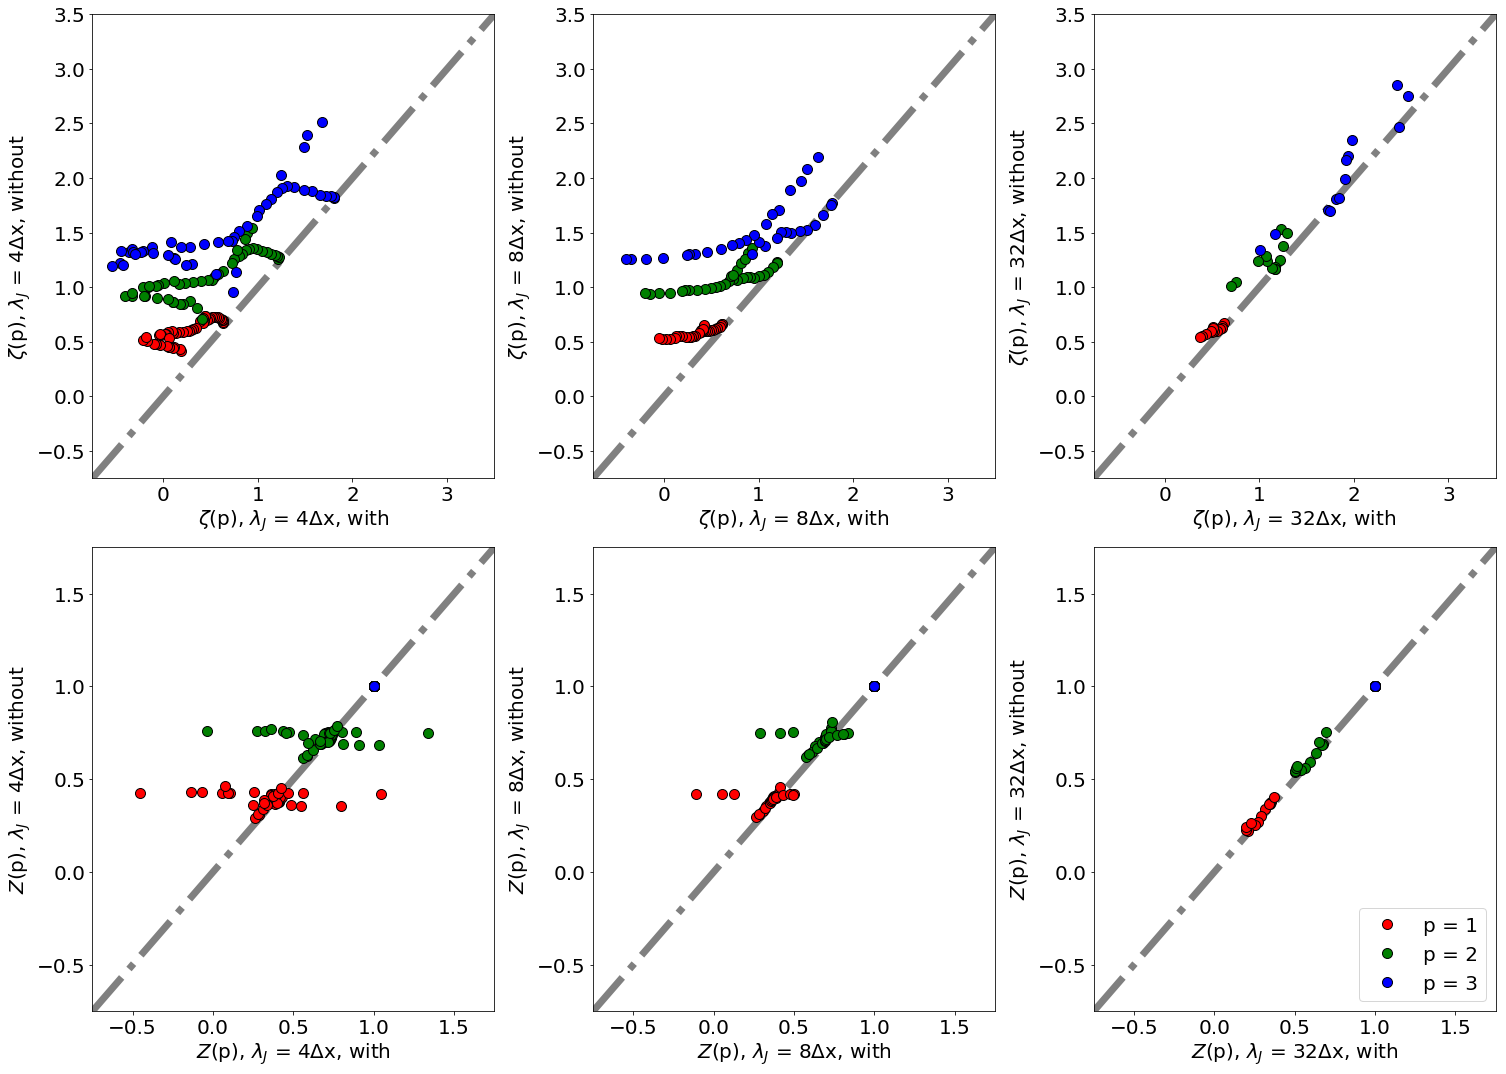

In [37]:
ncols,nrows = 3,2
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(21,15))

for ijeans in range(len(fjeans)):
    
    ifile  = glob(('%s%s/zeta_fitted_M3.out') % (ddir,fjeans[ijeans]))[0]
    zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(1,2,3),unpack=True)
    
    ifile  = glob(('%s%s_now/zeta_fitted_M3.out') % (ddir,fjeans[ijeans]))[0]
    zeta1now,zeta2now,zeta3now = np.loadtxt(ifile,skiprows=1,usecols=(1,2,3),unpack=True)
    
    for j in range(2):
        if(j==0): 
            tmp = limzeta
            xlabel = ('$\\zeta$(p), $\\lambda_J$ = %i$\\Delta$x, with' % (int(fjeans[ijeans])))
            ylabel = ('$\\zeta$(p), $\\lambda_J$ = %i$\\Delta$x, without' % (int(fjeans[ijeans])))
        else: 
            tmp = limz
            xlabel = ('$Z$(p), $\\lambda_J$ = %i$\\Delta$x, with' % (int(fjeans[ijeans])))
            ylabel = ('$Z$(p), $\\lambda_J$ = %i$\\Delta$x, without' % (int(fjeans[ijeans])))
            zeta1 = zeta1/zeta3
            zeta2 = zeta2/zeta3
            zeta3 = zeta3/zeta3
            zeta1now = zeta1now/zeta3now
            zeta2now = zeta2now/zeta3now
            zeta3now = zeta3now/zeta3now
            
        ax[j,ijeans].set_xlabel(xlabel)
        ax[j,ijeans].set_ylabel(ylabel)
        ax[j,ijeans].set_xlim(tmp)
        ax[j,ijeans].set_ylim(tmp)
        ax[j,ijeans].plot(np.array(tmp),np.array(tmp),color='grey',ls='-.',lw=lw)
    
        ax[j,ijeans].plot(zeta1,zeta1now,color=color[0],ls='',marker='o',ms=ms,markeredgecolor='black',label='p = 1')
        ax[j,ijeans].plot(zeta2,zeta2now,color=color[1],ls='',marker='o',ms=ms,markeredgecolor='black',label='p = 2')
        ax[j,ijeans].plot(zeta3,zeta3now,color=color[2],ls='',marker='o',ms=ms,markeredgecolor='black',label='p = 3')
    
ax[1,2].legend(loc=4)
fig.tight_layout(pad=0.5)
fig.savefig('comp_weighting.pdf')